In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Домашние задания пятого урока.

1. Имеются следующие данные о транзакциях в период с 01.12.2010 по 12.09.2011:

InvoiceNo — номер транзакции <br>
StockCode — код товара <br>
Description — описание товара <br>
Quantity — количество единиц товара, добавленных в заказ <br>
InvoiceDate — дата транзакции <br>
UnitPrice — цена за единицу товара <br>
CustomerID — id клиента <br>
Country — страна, где проживает клиент <br>
В данной задаче ссылка для считывания данных лежит в переменной path_to_file. Импортируйте пандас и прочитайте данные с кодировкой ISO-8859-1. Запишите <br> 
полученный датафрейм в retail, а названия колонок сохраните в переменную retail_columns

In [5]:
retail = pd.read_csv('5_data.csv.zip', compression='zip', encoding='ISO-8859-1')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
retail.shape

(541909, 8)

In [7]:
# Проверка правильности типов данных, тип CustomerID определен неверно
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
retail = retail.fillna(0)

In [10]:
retail = retail.astype({'CustomerID' : 'int64'})

In [11]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [12]:
retail_columns = retail.columns
retail_columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

2. Проверьте, встречаются ли в данных повторяющиеся наблюдения, и в качестве ответа укажите их количество. Если они есть, то удалите их из retail.

In [14]:
retail.duplicated().sum()

5268

In [15]:
len(retail)

541909

In [16]:
# Удаление дубликатов
retail = retail.drop_duplicates(keep = 'first')

In [17]:
len(retail)

536641

3. Данные содержат в себе записи как об успешных транзакциях, так и об отмененных. Если пользователь отменил заказ, в начале номера транзакции (InvoiceNo) ставится C (canceled). <br>
Сколько всего транзакций отменили пользователи? Считайте, что каждая строка - это отдельная транзакция.


In [19]:
len(retail[retail.InvoiceNo.str.startswith('C')])

9251

4. Теперь отфильтруйте данные и оставьте в retail только те заказы, где Quantity > 0. В качестве ответа укажите число оставшихся строк.

In [21]:
retail = retail[retail.Quantity > 0]
len(retail)

526054

5. Посчитайте число заказов для каждого пользователя (CustomerID) из Германии (Germany). Оставьте только тех, кто совершил более N транзакций (InvoiceNo), где N – 80% процентиль. Запишите полученные id пользователей в germany_top (не весь датафрейм, только id).

In [23]:
germany_customers = retail[retail.Country == 'Germany']
germany_customers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany
...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713,Germany
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713,Germany
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713,Germany
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713,Germany


In [24]:
N = germany_customers.groupby('CustomerID').InvoiceNo.nunique().quantile(0.8)
N

7.0

In [25]:
germany_top = germany_customers.groupby('CustomerID', as_index = False) \
                .InvoiceNo.nunique().query('InvoiceNo > @N').CustomerID
germany_top

3     12471
6     12474
8     12476
12    12481
16    12500
26    12524
37    12569
44    12600
51    12619
52    12621
56    12626
64    12647
69    12662
77    12705
78    12708
79    12709
81    12712
83    12720
Name: CustomerID, dtype: int64

In [26]:
len(germany_top)

18

6. Используя объект с id пользователей (germany_top), полученный на предыдущем шаге, отфильтруйте наблюдения и оставьте в данных записи только по интересующим нас юзерам. Результирующий датафрейм запишите в top_retail_germany.

In [28]:
top_retail_germany = retail[retail.CustomerID.isin(germany_top)]

7. Сгруппируйте top_retail_germany по коду товара (StockCode). Какой из продуктов добавляли в корзину чаще всего, кроме POST? <br>
Note: одним заказом считается единовременная покупка любого количества товара, т.е. без учета Quantity.


In [30]:
top_retail_germany.groupby('StockCode', as_index = False).CustomerID.count() \
                .rename(columns = ({'CustomerID':'count'})) \
                .sort_values('count', ascending = False)

,StockCode,count
1157,POST,213
409,22326,52
411,22328,38
453,22423,34
45,20719,30
...,...,...
520,22563,1
524,22569,1
528,22574,1
529,22576,1


8. Создайте колонку Revenue с суммой покупки, используя колонки Quantity и UnitPrice.

In [32]:
retail['Revenue'] = retail.Quantity * retail.UnitPrice

In [33]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


9. Для каждой транзакции (InvoiceNo), посчитайте финальную сумму заказа. В качестве ответа укажите топ-5 (InvoiceNo) по сумме заказа (через запятую с пробелом и в порядке убывания TotalRevenue)

In [46]:
top_revenue = retail.groupby('InvoiceNo', as_index = False).Revenue.sum().rename(columns={'Revenue':'TotalRevenue'}) \
       .sort_values('TotalRevenue',ascending = False).head(5)   
top_revenue

,InvoiceNo,TotalRevenue
20689,581483,168469.60
2202,541431,77183.60
17582,574941,52940.94
18251,576365,50653.91
9034,556444,38970.00


In [52]:
list(top_revenue.InvoiceNo)

['581483', '541431', '574941', '576365', '556444']

# Минипроект

## Задачи
1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику. <br>
2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
3. Сколько транзакций завершились ошибкой?
4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
6. Изучите представленный график. Помогите коллеге разобраться, есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

## Описание данных
Имеются следующие данные: <br>
•	date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05) <br>
•	name – имя пользователя <br>
•	transaction – статус транзакции <br>
•	minute* – сколько минут прошло с начала дня <br>

1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
Вопрос: сколько в датасете пропущенных значений?


In [54]:
data = pd.read_csv('5_transaction_data.csv')
data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [56]:
data.shape

(5315, 3)

In [58]:
data.date = pd.to_datetime(data.date)

In [60]:
data.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [62]:
data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [66]:
data.describe(include = 'all')

,date,name,transaction
count,5315,5315,5315
unique,NaN,56,3
top,NaN,Masha_Ozerova,successfull
freq,NaN,112,3692
mean,2020-03-02 00:43:56.628974592,NaN,NaN
min,2020-03-02 00:00:00,NaN,NaN
25%,2020-03-02 00:21:50.500000,NaN,NaN
50%,2020-03-02 00:43:26,NaN,NaN
75%,2020-03-02 01:06:22.500000,NaN,NaN
max,2020-03-02 01:29:05,NaN,NaN


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 124.7+ KB


2. Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? <br>
   Визуализируйте результат с помощью барплота. <br>
Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)


In [70]:
data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [74]:
transaction_counts = data.groupby('transaction', as_index = False).agg({'name':'count'}).rename(columns={'name':'count'})
transaction_counts

,transaction,count
0,cancelled,1619
1,error,4
2,successfull,3692


<Axes: xlabel='transaction', ylabel='count'>

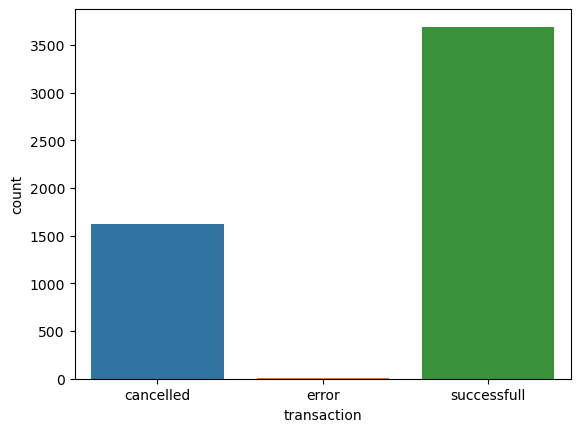

In [76]:
sns.barplot(x = transaction_counts['transaction'], y = transaction_counts['count'])

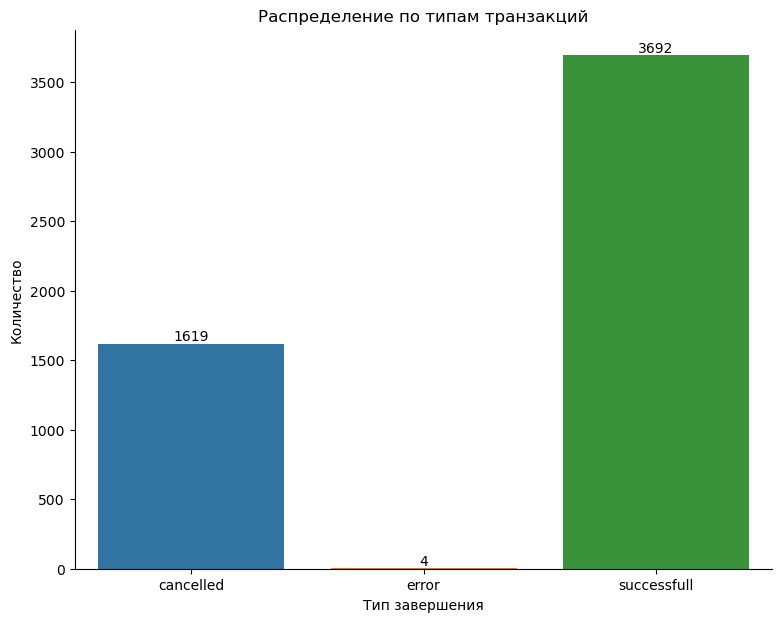

In [78]:
fig, ax = plt.subplots(figsize=(9,7))
sns.barplot(x = transaction_counts['transaction'], y = transaction_counts['count'], ax = ax)
ax.set_ylabel('Количество')
ax.set_xlabel('Тип завершения')
ax.set_title('Распределение по типам транзакций')
ax.bar_label(ax.containers[0]) # подписи для каждой ступеньки
sns.despine()

3. Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull <br>
Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где <br>
•	по оси x – число транзакций <br>
•	по оси y – доля пользователей с таким числом транзакций <br>

In [80]:
users_success = data[data.transaction == 'successfull'].groupby('name', as_index = False).transaction.count()
users_success.head()

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


In [82]:
users_success.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


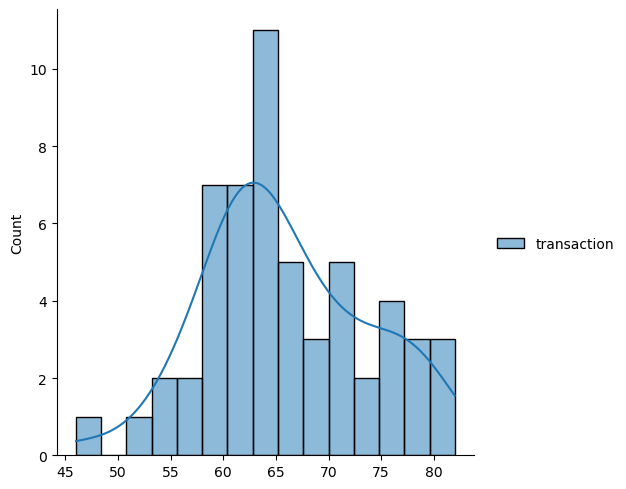

In [84]:
# Распределение близко к нормальному
sns.displot(users_success, kde = 'True', bins = 15)

4. К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где: <br>
•	столбцы – имена пользователей <br>
•	строки – минута времени осуществления операции (minute) <br>
•	значения – число совершённых операций <br>
Пропущенные значения заполните нулями.<br>


In [88]:
data_up = pd.read_csv('5_transaction_data_updated.csv', parse_dates = ['date'])
data_up.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [100]:
# Создадим сводную таблицу
# Строками будет являться количество минут прошедших с начала дня
# Столбцы - имена юзеров
# Значения в ячейках - количество транзакций, совершенных пользователем в определенную минуту
minutes_transactions = data_up.groupby(['name','minute'], as_index = False).transaction.count() \
        .pivot(index = 'minute', columns = 'name', values = 'transaction').reset_index()
minutes_transactions = minutes_transactions.fillna(0)
minutes_transactions

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0
9,9,2.0,4.0,2.0,3.0,4.0,0.0,3.0,2.0,2.0,...,2.0,3.0,1.0,2.0,4.0,2.0,3.0,0.0,1.0,4.0


In [98]:
# Число транзакций по минутам
trans = data_up.groupby('minute', as_index = False).transaction.count()
trans.head()

,minute,transaction
0,0,111
1,1,145
2,2,123
3,3,129
4,4,92


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 

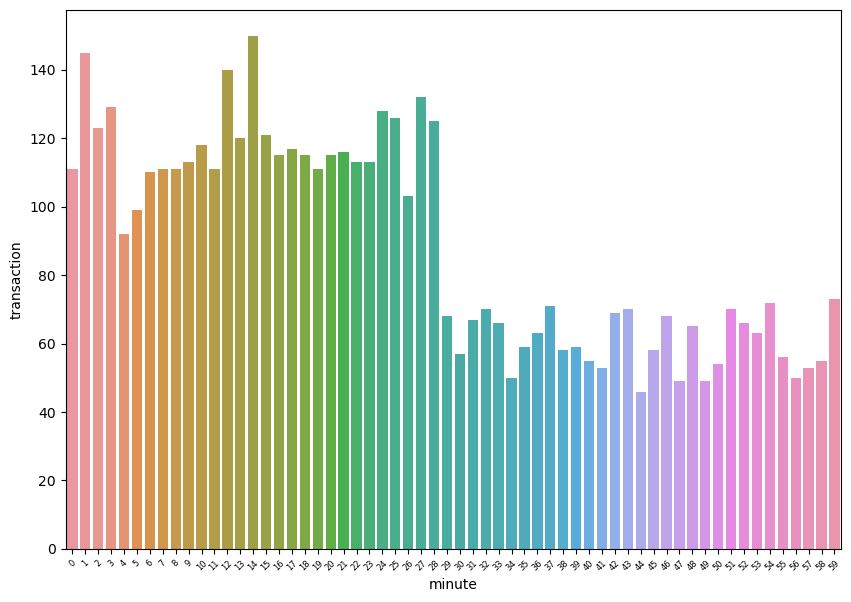

In [102]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x = trans['minute'], y = trans['transaction'])
plt.xticks(fontsize = 6, rotation = 45)

Выяснилось, что в данных ошибка. Столбец minutes подсчитан неправильно, он не учитывает часы, прошедшие с начала дня.

In [106]:
# Здесь можно заметить, что к 27 минуте относится и 00:27 и 1:27, что неверно.
data_up[data_up.minute == 27]

,date,name,transaction,minute
23,2020-03-02 01:27:01,Svetlana_Ozerova,successfull,27
51,2020-03-02 00:27:43,Svetlana_Ivanova,successfull,27
138,2020-03-02 00:27:32,Irina_Smirnova,successfull,27
171,2020-03-02 01:27:04,Lolita_Fedorova,successfull,27
280,2020-03-02 00:27:20,Lolita_Lesnova,cancelled,27
...,...,...,...,...
5106,2020-03-02 01:27:06,Masha_Polyanova,cancelled,27
5138,2020-03-02 00:27:30,Julia_Fedorova,successfull,27
5209,2020-03-02 01:27:51,Ekaterina_Petrova,successfull,27
5251,2020-03-02 01:27:42,Lolita_Ivanova,cancelled,27


In [108]:
data_up['minute'] = data_up.date.dt.hour * 60 + data_up.date.dt.minute
data_up.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [112]:
minutes_transactions = data_up.groupby(['name','minute'], as_index = False).transaction.count() \
        .pivot(index = 'minute', columns = 'name', values = 'transaction').reset_index()
minutes_transactions = minutes_transactions.fillna(0)
minutes_transactions

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,1.0,3.0,0.0,1.0,3.0,3.0,2.0,1.0,1.0,...,0.0,2.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0
1,1,1.0,4.0,0.0,3.0,2.0,1.0,3.0,1.0,2.0,...,2.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0
2,2,1.0,1.0,2.0,3.0,1.0,0.0,2.0,1.0,1.0,...,2.0,0.0,2.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0
3,3,2.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,...,0.0,2.0,2.0,0.0,4.0,0.0,1.0,2.0,1.0,0.0
4,4,2.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,1.0,...,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,4.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,...,2.0,2.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0
86,86,0.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0
87,87,3.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
88,88,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0,1.0,...,1.0,1.0,3.0,2.0,2.0,0.0,0.0,2.0,2.0,3.0


In [114]:
trans = data_up.groupby('minute', as_index = False).transaction.count()
trans

,minute,transaction
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57
...,...,...
85,85,68
86,86,52
87,87,59
88,88,62


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
 

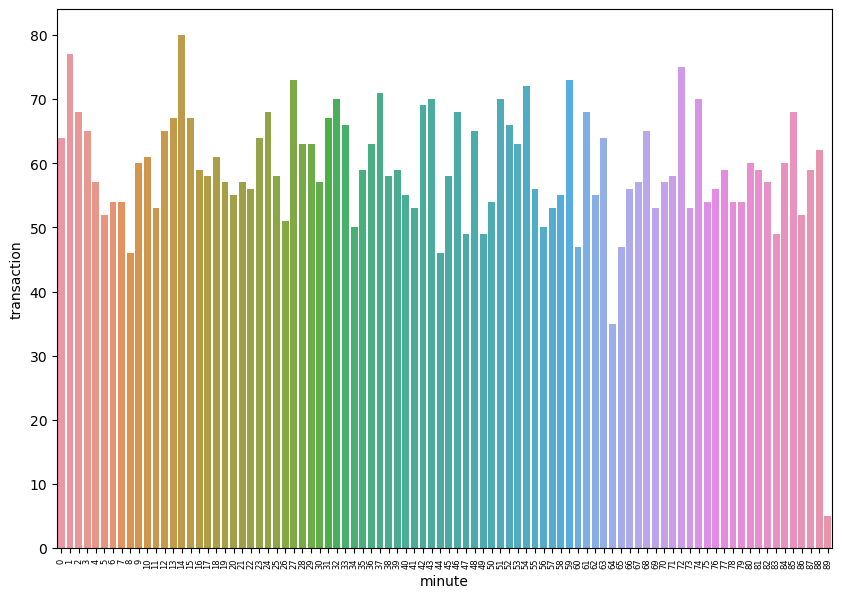

In [116]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x = trans['minute'], y = trans['transaction'])
plt.xticks(fontsize = 6, rotation = 90)

# Дополнительный проект

В папке subsid (shared/homeworks/python_ds_miniprojects/5_subsid) находятся файлы (tm_sales_1, tm_sales_2, ...) с продажами продуктов через телемаркетинг. <br>
Каждый файл содержит, как минимум, 4 колонки (поля): FILIAL_ID, SUBS_ID, PROD_ID, ACT_DTTM. <br>

Суть задачи в том, чтобы проверить подключения продуктов определенным пользователям, соединив файлы о продажах с логами по подключениям в системе. <br>
Особенности данных: <br>

1.	сотрудники телемаркетинга не всегда указывают полный id, если 'id' нет в начале SUBS_ID, то нужно его добавить <br>
2.	поля в файлах могут быть расположены абсолютно случайным образом, но названия полей статичны <br>
3.	продажа не засчитывается, если отключение (END_DTTM) произошло меньше чем через 5 минут после подключения (START_DTTM) <br>
4.	если в файле с продажами встречается строка без указанного SUBS_ID, она пропускается <br>


In [118]:
logs = pd.read_csv('5_subsid/prod_activations_logs.csv', sep = ';', parse_dates = ['START_DTTM'])
logs

C:\Users\фвьшт\AppData\Local\Temp\ipykernel_15960\1870315309.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  logs = pd.read_csv('5_subsid/prod_activations_logs.csv', sep = ';', parse_dates = ['START_DTTM'])


,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,2020-03-20 14:59:00,01-12-2020 00:00
5,id7646509,6431,2020-03-19 13:00:00,19-03-2020 13:03
2,id7461794,3310,2020-03-20 17:25:00,01-12-2020 00:00
3,id5416547,1743,2020-03-17 10:17:00,25-03-2020 11:00
4,id8238421,1859,2020-03-01 11:42:00,01-03-2020 11:43
3,id8641743,2752,2020-03-20 15:44:00,21-04-2020 15:44
2,id2185490,3210,2020-03-16 16:28:00,01-12-2020 00:00
6,id7642700,3020,2020-03-15 14:21:00,15-03-2020 23:42
2,id8741631,5677,2020-03-19 12:28:00,01-12-2020 00:00


In [120]:
logs.END_DTTM = pd.to_datetime(logs.END_DTTM, format = '%d-%m-%Y %H:%M')

In [122]:
logs.dtypes

SUBS_ID               object
PROD_ID               object
START_DTTM    datetime64[ns]
END_DTTM      datetime64[ns]
dtype: object

Посмотрим на данные, которые хранятся в sales таблицах

In [127]:
sales = pd.read_csv('5_subsid/tm_sales_2.csv', sep = ';')
sales.head()

,FILIAL_ID,SUBS_ID,PROD_ID,ACT_DTTM
0,3,id5416547,1743,17-03-2020 10:17
1,4,NaN,7421,12-03-2020 11:25
2,7,8362218,9879,05-03-2020 11:42
3,2,2185490,3210,16-03-2020 16:28


Каждый раз данные о продажах будут добавляться в папку, нужно вычислить максимальный индекс, до которого необходимо проходить по файлам продаж.

In [130]:
def max_sales_index():
    sales_num = 0
    while f'tm_sales_{sales_num+1}.csv' in os.listdir('5_subsid'):
        sales_num += 1
    return sales_num
max_sales = max_sales_index()
print(max_sales)

3


In [162]:
df = pd.DataFrame(columns = ['ACT_DTTM','FILIAL_ID','SUBS_ID','DIFFERENCE'])
sales_num = 1
while sales_num <= max_sales: # последовательно открываем 
    sales = pd.read_csv(f'5_subsid/tm_sales_{sales_num}.csv', sep = ';')
    sales_num += 1
    for i in range (len(sales)): # проход по строкам исходного sale dataframe
        # ACT_DTTM;FILIAL_ID;difference
        subs_id = sales.SUBS_ID[i]
        act_dttm = pd.to_datetime(sales.ACT_DTTM[i], dayfirst=True)
        filial_id = sales.FILIAL_ID[i]
        if sales.SUBS_ID[i] == '': # пропуск строки без SUBS_ID
            continue
        if (not str(sales.SUBS_ID[i]).startswith('id')): # вставить id в subs_id если не указано
            subs_id = 'id' + str(sales.SUBS_ID[i])
        if (len(logs[logs.SUBS_ID == subs_id]) > 0): # проверка на подключение больше 5 минут
           if(((logs[logs.SUBS_ID == subs_id].END_DTTM - logs[logs.SUBS_ID == subs_id].START_DTTM).dt.total_seconds() / 60).iat[0] < 5):
               continue
        else:
            continue
        diff = ((logs[logs.SUBS_ID == subs_id].END_DTTM - logs[logs.SUBS_ID == subs_id].START_DTTM).dt.total_seconds() / 60).iat[0]
        sample = pd.DataFrame({'ACT_DTTM' : [act_dttm], 'FILIAL_ID' : [filial_id], 'SUBS_ID': [subs_id], 'DIFFERENCE': [diff]})
        df = pd.concat([df,sample], axis = 0)

print(df)
    

             ACT_DTTM FILIAL_ID    SUBS_ID  DIFFERENCE
0 2020-03-20 14:59:00         1  id4651830    367741.0
0 2020-03-17 10:17:00         3  id5416547     11563.0
0 2020-03-16 16:28:00         2  id2185490    373412.0
0 2020-03-15 14:21:00         6  id7642700       561.0


C:\Users\фвьшт\AppData\Local\Temp\ipykernel_15960\970752534.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,sample], axis = 0)
